# Who lives within walking distance to a park in Delta?

Let's use data from OpenStreetMap to find out. 

In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# First, get a network of all the roads/paths/bikelanes in Delta

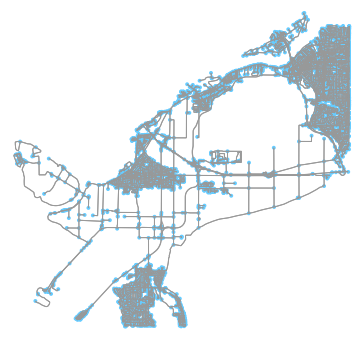

(<Figure size 705.387x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11dc27d30>)

In [2]:
G = ox.graph_from_place("Delta, British Columbia", network_type = 'all')
ox.plot_graph(G)

In [3]:
ox.save_load.save_graph_shapefile(G, "all_network_delta")

## Now load up all zoning data for Delta and take just public space/parks. We'll miss out on the provincially managed parks, but capture the municipal ones. 

In [4]:
zoning_delta = gpd.read_file('Zoning_Parcels.shp')

In [5]:
delta_public = zoning_delta[zoning_delta['ZONE_DESCR'] == 'PUBLIC USE']
delta_parks = zoning_delta[zoning_delta['ZONE_DESCR'] == 'PUBLIC PARKS AND RECREATION']

## Plot the parkland

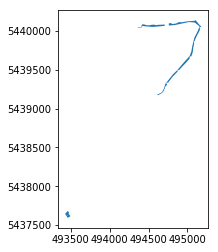

In [6]:
delta_parks.plot()

## And the public lands, which are more common. Let's use those:

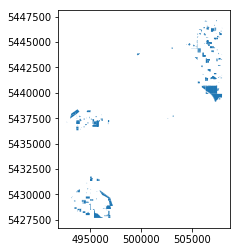

In [7]:
delta_public.plot()

## Now from each record of a public space, we'll generate a street network for each location. Here's an example:

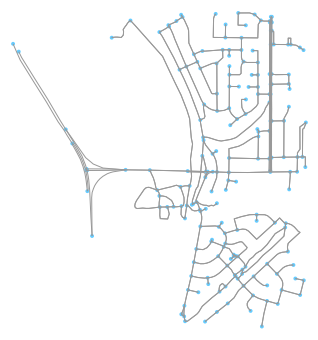

(<Figure size 616.449x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c98c128>)

In [8]:
g_t = ox.graph_from_address('11364 72 AVE, Delta, BC')
ox.plot_graph(g_t)

In [9]:
addys = []
for i in delta_public.itertuples():
    if len(i.ADDRESS) > 1:
        ad = " ".join([i.ADDRESS, i.STREET, "Delta, BC"])
    else:
        ad = " ".join([i.STREET, "Delta, BC"])
    addys.append(ad)
for i in delta_parks.itertuples():
    if len(i.ADDRESS) > 1:
        ad = " ".join([i.ADDRESS, i.STREET, "Delta, BC"])
    else:
        ad = " ".join([i.STREET, "Delta, BC"])
    addys.append(ad)
    

## Let's take a sample of the addresses (we don't need all of them for now), and find the street network within 300, 500, and 800m of each place. Something might go wrong with the geocoding, so let's catch the exception and print a message so we know. 

Exception on 12


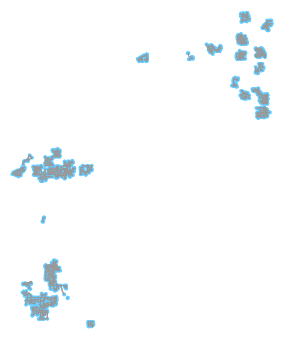

(<Figure size 545.971x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ca5aef0>)

In [14]:
import networkx as nx
G_merge = nx.MultiDiGraph()
total_missed = 0
for i in addys[0:100]:
    try:
        g_temp = ox.graph_from_address(i, distance = 300)
        G_merge = nx.compose(G_merge, g_temp)
    except:
        total_missed += 1
    
print("Exception on {}".format(total_missed))
ox.plot_graph(G_merge, save = True, filename = 'delta_walking_distance_300m')

Exception on 11


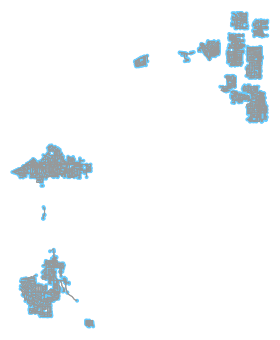

(<Figure size 537.201x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1244fbcf8>)

In [15]:
G_merge = nx.MultiDiGraph()
total_missed = 0
for i in addys[0:100]:
    try:
        g_temp = ox.graph_from_address(i, distance = 500)
        G_merge = nx.compose(G_merge, g_temp)
    except:
        total_missed += 1
    
print("Exception on {}".format(total_missed))
ox.plot_graph(G_merge, save = True, filename = 'delta_walking_distance_500m')

Exception on 11


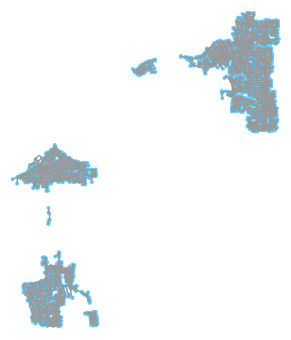

(<Figure size 560.131x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d106fd0>)

In [16]:
G_merge = nx.MultiDiGraph()
total_missed = 0
for i in addys[0:100]:
    try:
        g_temp = ox.graph_from_address(i, distance = 800)
        G_merge = nx.compose(G_merge, g_temp)
    except:
        total_missed += 1
    
print("Exception on {}".format(total_missed))
ox.plot_graph(G_merge, save = True, filename = 'delta_walking_distance_800m')

## And there we have it; maps of street networks within 300, 500, and 800 metres of a public place in Delta. 